In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("concrete_data.csv")

In [3]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [6]:
data.shape

(1030, 9)

In [10]:
def statistics():
    text.delete('1.0',END)
    text.insert(END,"Top FIVE rows of the Dataset\n\n")
    text.insert(END,data.head())
    stats=data.describe()
    text.insert(END,"\n\nStatistical Measurements for Data\n\n")
    text.insert(END,stats)
    null=data.isnull().sum()
    text.insert(END,null)

    

In [11]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [14]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


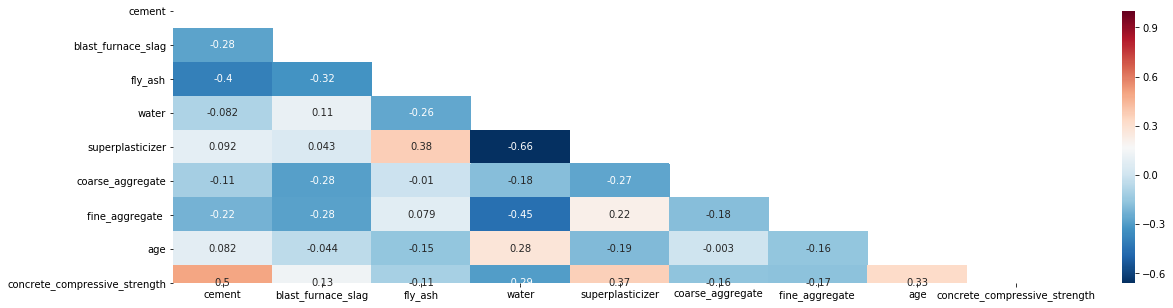

In [16]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [24]:
X=data.drop(['concrete_compressive_strength'],axis=1)
X

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [25]:
y=data['concrete_compressive_strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)


In [27]:
X_train,X_test,y_train,y_test

(     cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
 772   382.0                 0.0      0.0  186.0               0.0   
 997   310.0               142.8      0.0  167.9              10.0   
 724   310.0                 0.0      0.0  192.0               0.0   
 167   475.0               118.8      0.0  181.1               8.9   
 764   385.0                 0.0      0.0  186.0               0.0   
 ..      ...                 ...      ...    ...               ...   
 277   251.4                 0.0    118.3  188.5               5.8   
 763   385.0                 0.0      0.0  186.0               0.0   
 835   144.0                 0.0    175.0  158.0              18.0   
 559   239.6               359.4      0.0  185.7               0.0   
 684   192.0               288.0      0.0  192.0               0.0   
 
      coarse_aggregate  fine_aggregate   age  
 772            1047.0            739.0    7  
 997             914.3            804.0   28  
 724            1

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
x_train = sc_X.fit_transform(X_train)
x_test = sc_X.transform(X_test)
x_train

array([[0.63926941, 0.        , 0.        , ..., 0.73807381, 0.36377321,
        0.01648352],
       [0.47488584, 0.39732888, 0.        , ..., 0.33993399, 0.52684395,
        0.07417582],
       [0.47488584, 0.        , 0.        , ..., 0.63306331, 0.59207225,
        0.24450549],
       ...,
       [0.09589041, 0.        , 0.87456272, ..., 0.4260426 , 0.62719518,
        0.07417582],
       [0.31415525, 1.        , 0.        , ..., 0.42184218, 0.17636729,
        0.07417582],
       [0.20547945, 0.80133556, 0.        , ..., 0.38643864, 0.30632213,
        0.24450549]])

In [29]:
regressor = RandomForestRegressor(max_depth=5,n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = regressor.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

In [32]:
features

,Importance
Feature,
age,0.375763
cement,0.336455
water,0.102757
superplasticizer,0.083624
blast_furnace_slag,0.058729
fine_aggregate,0.020230
coarse_aggregate,0.013505
fly_ash,0.008936


In [33]:
def RF():
    global New_data,data_test
    global x_train,x_test,y_train,y_test
    
    clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
    clf = clf.fit(x_train, y_train)
    
    predictions = clf.predict(x_test)
    df_output = pd.DataFrame()
    df_output['concreate_strength'] = data['concrete_compressive_strength']
    df_output['predited_concreate_strength'] = pd.DataFrame(predictions)
    df_output[['concreate_strength','predited_concreate_strength']].to_csv('concrete_strength@RF.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
    
    
RF()

MAE=  3.8324429141624266
MSE=  27.316471513446142
RMS=  5.226516192785223

r_square: 0.89358591751198

Predicted values on the New Data:

       concreate_strength  predited_concreate_strength
0                  79.99                      31.5780
1                  61.89                       8.7816
2                  40.27                      79.2200
3                  41.05                      55.6846
4                  44.30                      11.9340
...                  ...                          ...
1025               44.28                          NaN
1026               31.18                          NaN
1027               23.70                          NaN
1028               32.77                          NaN
1029               32.40                          NaN

[1030 rows x 2 columns]


In [34]:
def LR():
    lr = LinearRegression()
    lr = lr.fit(x_train, y_train)
    
    predictions = lr.predict(x_test)
    df_output = pd.DataFrame()
    df_output['concreate_strength'] = data['concrete_compressive_strength']
    df_output['predited_concreate_strength'] = pd.DataFrame(predictions)
    df_output[['concreate_strength','predited_concreate_strength']].to_csv('concrete_strength@lr.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)

LR()

MAE=  7.7756257101890345
MSE=  93.61873598596337
RMS=  9.675677546609506

r_square: 0.6352987285077925

Predicted values on the New Data:

       concreate_strength  predited_concreate_strength
0                  79.99                    39.473336
1                  61.89                    14.081811
2                  40.27                    60.906175
3                  41.05                    53.492165
4                  44.30                    23.956521
...                  ...                          ...
1025               44.28                          NaN
1026               31.18                          NaN
1027               23.70                          NaN
1028               32.77                          NaN
1029               32.40                          NaN

[1030 rows x 2 columns]


In [36]:
def KNN():
    knn = KNeighborsRegressor()
    knn = knn.fit(x_train, y_train)
    
    predictions = knn.predict(x_test)
    df_output = pd.DataFrame()
    df_output['concreate_strength'] = data['concrete_compressive_strength']
    df_output['predited_concreate_strength'] = pd.DataFrame(predictions)
    df_output[['concreate_strength','predited_concreate_strength']].to_csv('concrete_strength@knn.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)

    
KNN()

MAE=  7.610148867313916
MSE=  96.28722653721682
RMS=  9.8126054917752

r_square: 0.6249033531936782

Predicted values on the New Data:

       concreate_strength  predited_concreate_strength
0                  79.99                       42.528
1                  61.89                       13.738
2                  40.27                       78.500
3                  41.05                       54.150
4                  44.30                       23.670
...                  ...                          ...
1025               44.28                          NaN
1026               31.18                          NaN
1027               23.70                          NaN
1028               32.77                          NaN
1029               32.40                          NaN

[1030 rows x 2 columns]


In [37]:
def svr():
    svr = SVR(kernel='rbf')
    svr = svr.fit(x_train, y_train)
    
    predictions = svr.predict(x_test)
    df_output = pd.DataFrame()
    df_output['concreate_strength'] = data['concrete_compressive_strength']
    df_output['predited_concreate_strength'] = pd.DataFrame(predictions)
    df_output[['concreate_strength','predited_concreate_strength']].to_csv('concrete_strength@svr.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    
    print("\nPredicted values on the New Data:\n\n",df_output)
svr()

MAE=  10.901895403194905
MSE=  182.7710448132835
RMS=  13.51928418272519

r_square: 0.2879968765508877

Predicted values on the New Data:

       concreate_strength  predited_concreate_strength
0                  79.99                    36.576532
1                  61.89                    28.248098
2                  40.27                    40.860632
3                  41.05                    38.906223
4                  44.30                    30.279661
...                  ...                          ...
1025               44.28                          NaN
1026               31.18                          NaN
1027               23.70                          NaN
1028               32.77                          NaN
1029               32.40                          NaN

[1030 rows x 2 columns]


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(x_train,np.ravel(y_train,order='C'))

In [42]:
def GB():
    gbr = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.09, max_depth=5)
    gbr= gbr.fit(x_train, y_train)
    
    predictions = gbr.predict(x_test)
    df_output = pd.DataFrame()
    df_output['concreate_strength'] = data['concrete_compressive_strength']
    df_output['predited_concreate_strength'] = pd.DataFrame(predictions)
    df_output[['concreate_strength','predited_concreate_strength']].to_csv('concrete_strength@svr.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    
    print("\nPredicted values on the New Data:\n\n",df_output)
GB()

MAE=  3.6922688556508705
MSE=  25.801459651512182
RMS=  5.079513721953331

r_square: 0.899487799721284

Predicted values on the New Data:

       concreate_strength  predited_concreate_strength
0                  79.99                    28.875604
1                  61.89                     9.904160
2                  40.27                    77.897764
3                  41.05                    68.578987
4                  44.30                    11.063053
...                  ...                          ...
1025               44.28                          NaN
1026               31.18                          NaN
1027               23.70                          NaN
1028               32.77                          NaN
1029               32.40                          NaN

[1030 rows x 2 columns]


In [51]:
def input_values():
    list=[[0.63926941, 0. , 0. , 0.5,0., 0.73807381, 0.36377321,
        0.01648352]]
    gbr = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.09, max_depth=5)
    gbr= gbr.fit(x_train, y_train)
    
    predictions = gbr.predict(list)
    return predictions

In [52]:
input_values()

array([23.34370055])